In [1]:
import numpy as np

# 读取
data = np.load("AB_points_noise_pred_56_channel10.npz")

# 查看里面存了哪些 key
print("keys:", data.files)
# 输出类似: ['A_steps', 'B_steps', 'A0', 'B0']

# 分别取出
A_steps = data["A_steps"]  # shape [T, F]
B_steps = data["B_steps"]  # shape [T, F]
C_steps = data["C_steps"]  # shape [T, F]
A0 = data["A0"]            # shape [F]
B0 = data["B0"]            # shape [F]
C0 = data["C0"]            # shape [F]
A_final = data["A_final"]  # shape [T, F]
B_final = data["B_final"]  # shape [T, F]
C_final = data["C_final"]  # shape [T, F]


print("A_steps.shape =", A_steps.shape)
print("B_steps.shape =", B_steps.shape)
print("C_final.shape =", C_final.shape)
print("A0.shape =", A0.shape)
print("B0.shape =", B0.shape)


frame=20
# 举例: 取第 0 个 timestep、第 10 帧上的值
print("t=0, f=",frame, "A:", A_steps[0, frame], " B:", B_steps[0, frame],"C:",C_steps[0,frame],"A_final:",A_final[frame],"B_final:",B_final[frame],"C_final:",C_final[frame])

# 举例: 画一条曲线 (某一帧上 A 的预测值随 timestep 变化)



keys: ['A_final', 'B_final', 'C_final', 'A_steps', 'B_steps', 'C_steps', 'A0', 'B0', 'C0']
A_steps.shape = (50, 21)
B_steps.shape = (50, 21)
C_final.shape = (21,)
A0.shape = (21,)
B0.shape = (21,)
t=0, f= 20 A: -2.7581177  B: -1.6679688 C: -0.9367676 A_final: 1.6791161 B_final: 1.6440263 C_final: 0.44660416


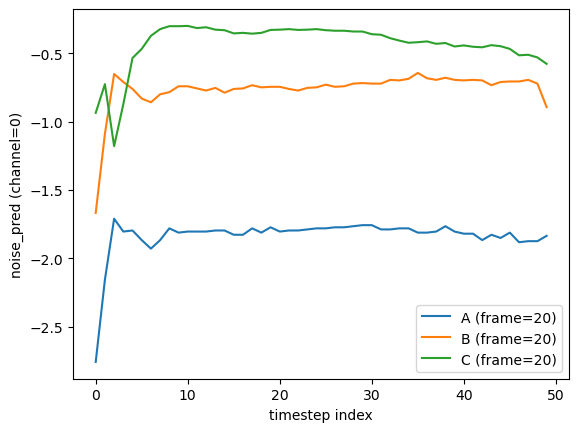

In [2]:

import matplotlib.pyplot as plt
plt.figure()
plt.plot(A_steps[:, frame], label=f"A (frame={frame})")
plt.plot(B_steps[:, frame], label=f"B (frame={frame})")
plt.plot(C_steps[:, frame], label=f"C (frame={frame})")
plt.legend()
plt.xlabel("timestep index")
plt.ylabel("noise_pred (channel=0)")
plt.savefig(f"plot_56_{frame}_channel10.png", dpi=150)


In [6]:
(A0-B0)/50


array([ 7.43800262e-03,  7.70824449e-03, -7.77852535e-03,  5.33398390e-02,
       -9.48565919e-03, -9.37914848e-03, -1.46639310e-02, -6.19503483e-03,
       -2.06197817e-02,  2.50989571e-02, -5.83076337e-03,  1.00472011e-02,
        4.75541353e-02,  2.20887009e-02, -8.85792449e-03, -1.93528794e-02,
       -1.17373465e-05, -5.91008551e-03, -1.24717271e-02,  1.90653130e-02,
        1.49765359e-02], dtype=float32)

In [5]:

import matplotlib
matplotlib.use("Agg")   # 使用非交互式后端
import matplotlib.pyplot as plt

plt.figure()
plt.plot(C_steps[:, frame], label=f"A (frame={frame})")
plt.plot(C_steps[:, frame-1], label=f"A (frame={frame-1})")
plt.legend()
plt.xlabel("timestep index")
plt.ylabel("noise_pred (channel=0)")
plt.savefig(f"plot_frame_56_{frame}_channel10.png", dpi=150)
#plt.close()


In [5]:
B_steps[:, frame-1]-B_steps[:, frame-2]

array([-1.0673828, -1.1040039, -1.1207275, -1.1455078, -1.0893555,
       -1.1074219, -1.1035156, -1.1196289, -1.1025391, -1.1352539,
       -1.1506348, -1.097168 , -1.130127 , -1.0871582, -1.1247559,
       -1.1320801, -1.1191406, -1.0859375, -1.1269531, -1.1040039,
       -1.1174316, -1.1069336, -1.0942383, -1.1074219, -1.1152344,
       -1.1091309, -1.1047363, -1.1088867, -1.1081543, -1.079834 ,
       -1.1279297, -1.0861816, -1.0819092, -1.126709 , -1.1151123,
       -1.1097412, -1.1002197, -1.0744629, -1.0974121, -1.0893555,
       -1.1015625, -1.1497803, -1.088623 , -1.15625  , -1.1223145,
       -1.1552734, -1.1333008, -1.1572266, -1.0859375, -1.0078125],
      dtype=float32)